## Load Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("..")

import numpy as np
from importlib import reload 
import networkx as nx 
from tqdm import tqdm 

import torch
import torch_geometric as geonn
from torch_geometric.loader import DataListLoader, DataLoader

from utilities import reader
import vis

import test as tst

from importlib import reload

Random seed set as 1234
Random seed set as 1234


## Load GPU and test dataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on {}. GPU model : {}".format(device, torch.cuda.get_device_name(0)))

path_dataset = "../../dataset/dVarHsize"

dataset_test = reader.BuildDataset(root = path_dataset, mode = 'test', precision = torch.float)
loader_test = DataListLoader(dataset_test,  batch_size = 50, shuffle = False, num_workers = 0)
print("Number of samples in the test dataset : ", len(dataset_test))

Running on cuda. GPU model : Quadro T2000 with Max-Q Design
Number of samples in the test dataset :  2000


Run the following cell to compute the average diameter of the samples in the test dataset

In [3]:
# distance = []
# for k in tqdm(range(len(dataset_test))):

#     data = dataset_test[k]
#     dictpos = {}
#     for i in range(len(data.pos)):
#         dictpos[i] = np.asarray([data.pos[i,0].item(), data.pos[i,1].item()])
    
#     net_data = geonn.utils.to_networkx(data, to_undirected = False, remove_self_loops=False)
#     G = net_data.to_undirected()
#     G.remove_edges_from(nx.selfloop_edges(G))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     d = nx.distance_measures.diameter(G)
#     distance.append(d)
#     dictpos.clear()
    
# print("Mean geodesic distance : ", np.mean(distance))
# print("Max geodesic distance : ", np.max(distance))
# print("Min geodesic distance : ", np.min(distance))

In [4]:
ckpt = torch.load("../results/best_model/ckpt/running_model.pt")

list_running_train_model = [ckpt["hist_train"]]
list_running_val_model = [ckpt["hist_val"]]
list_running_names = ["PSIGNN"]

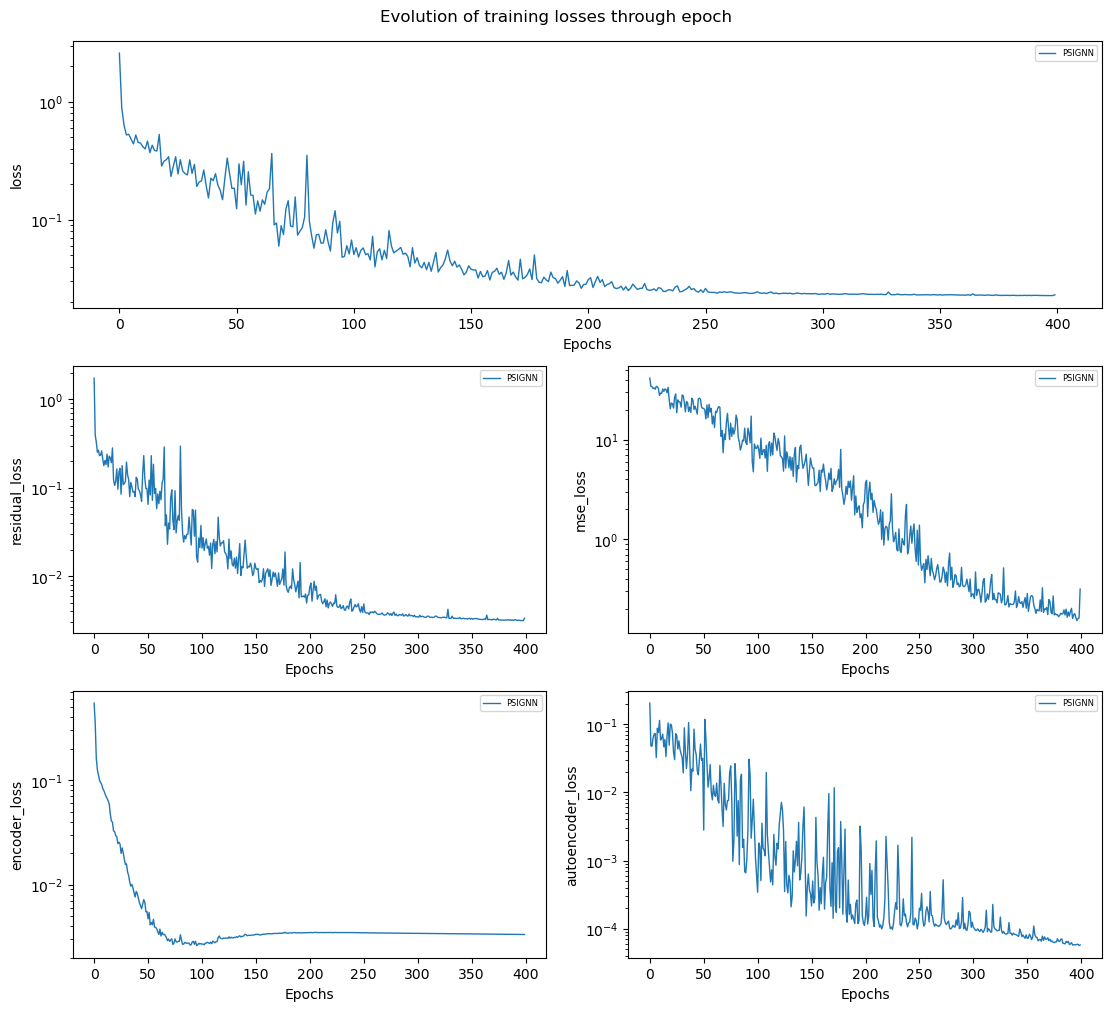

In [5]:
reload(vis)
vis.visualize_losses(list_running_train_model, list_running_names)

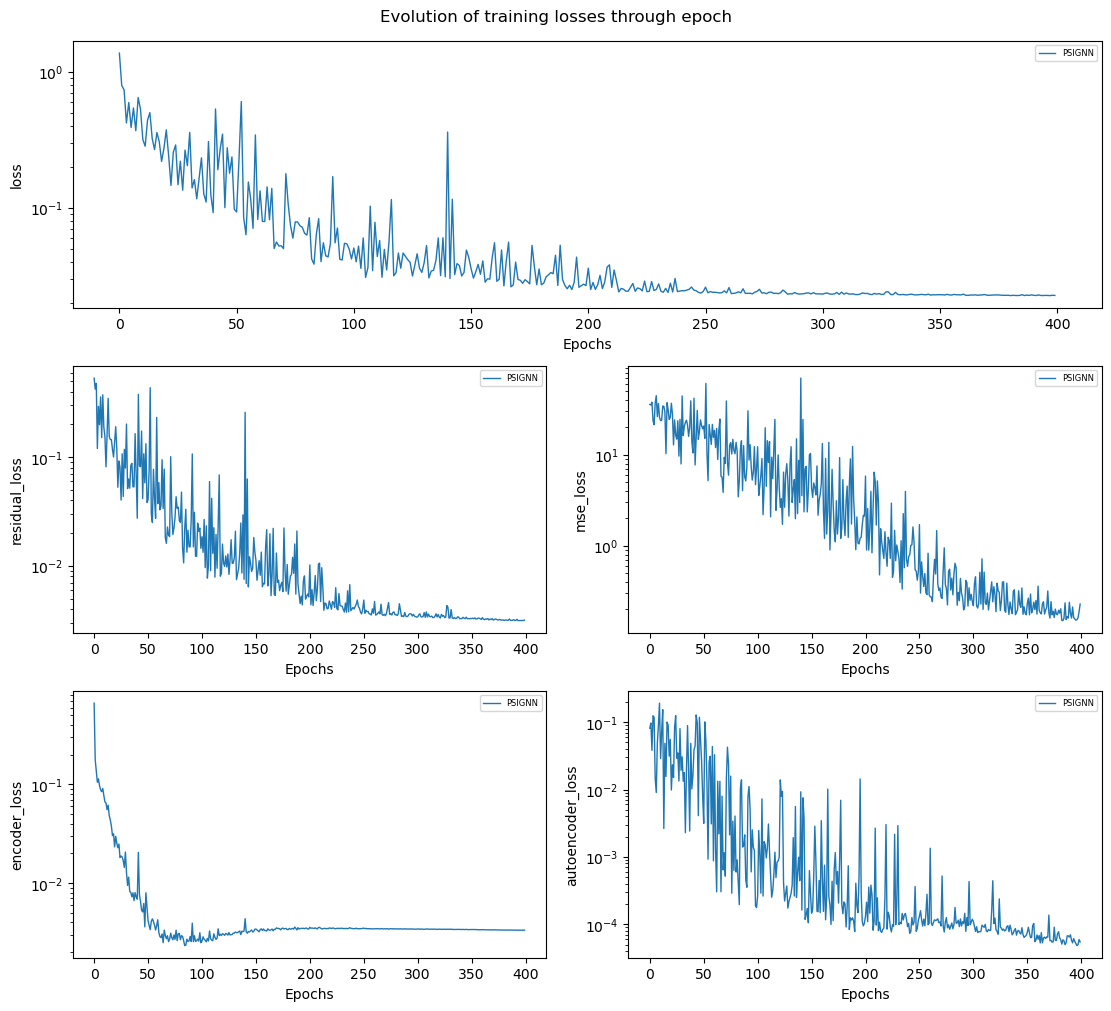

In [6]:
reload(vis)
vis.visualize_losses(list_running_val_model, list_running_names)

### Test on the full dataset

In [3]:
ckpt_best = torch.load("../results/best_model/ckpt/best_model.pt")

list_best_model = [ckpt_best]

list_best_names = ["PSIGNN"]

In [4]:
reload(tst)
tst.test_dataset(list_best_model, list_best_names, loader_test, device)

Random seed set as 1234
Evaluation model :  PSIGNN
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 500, 'bw_tol': 1e-08, 'bw_thres': 500, 'solver': <function broyden at 0x7efe54f57700>, 'path_logs': 'results/08_06_2023_18:02:27/logs'}


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [01:47<00:00,  2.68s/it]

std Res :  0.00027666263304168266
std MSE :  0.03993321473963508
std Dirichlet :  4.847592630415067e-05
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name   │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ PSIGNN │  3.162e-03 │ 1.464e-01 │      9.176e-05 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


In [122]:
import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[alea]
print(data)

Random sample :  228
Data(x=[470, 1], edge_index=[2, 3003], edge_attr=[3003, 3], y=[470, 1], pos=[470, 2], a_ij=[3003, 1], sol=[470, 1], prb_data=[470, 3], tags=[470, 3], unit_normal_vector=[470, 2])


Random seed set as 1234
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 500, 'bw_tol': 1e-08, 'bw_thres': 500, 'solver': <function broyden at 0x7efe54f57700>, 'path_logs': 'results/08_06_2023_18:02:27/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        470 │  1.956e-03 │ 5.852e-02 │      2.305e-06 │     5.555e-02 │      73 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


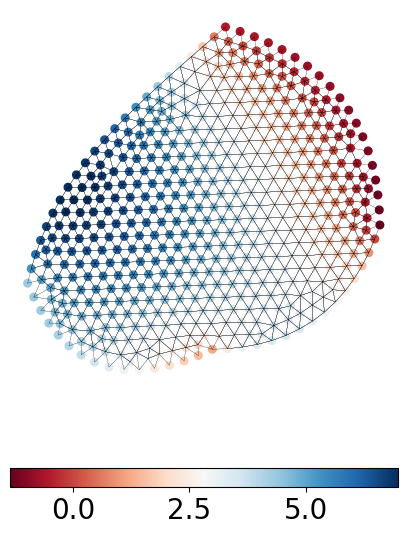

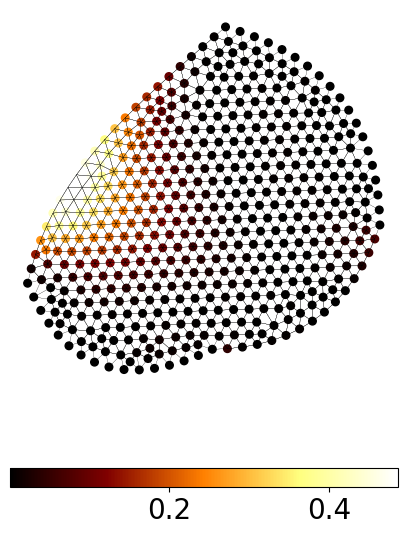

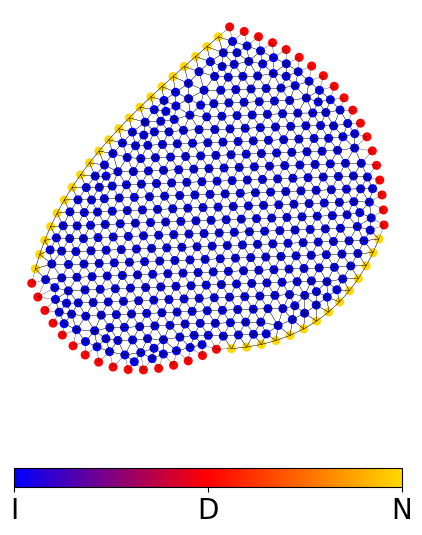

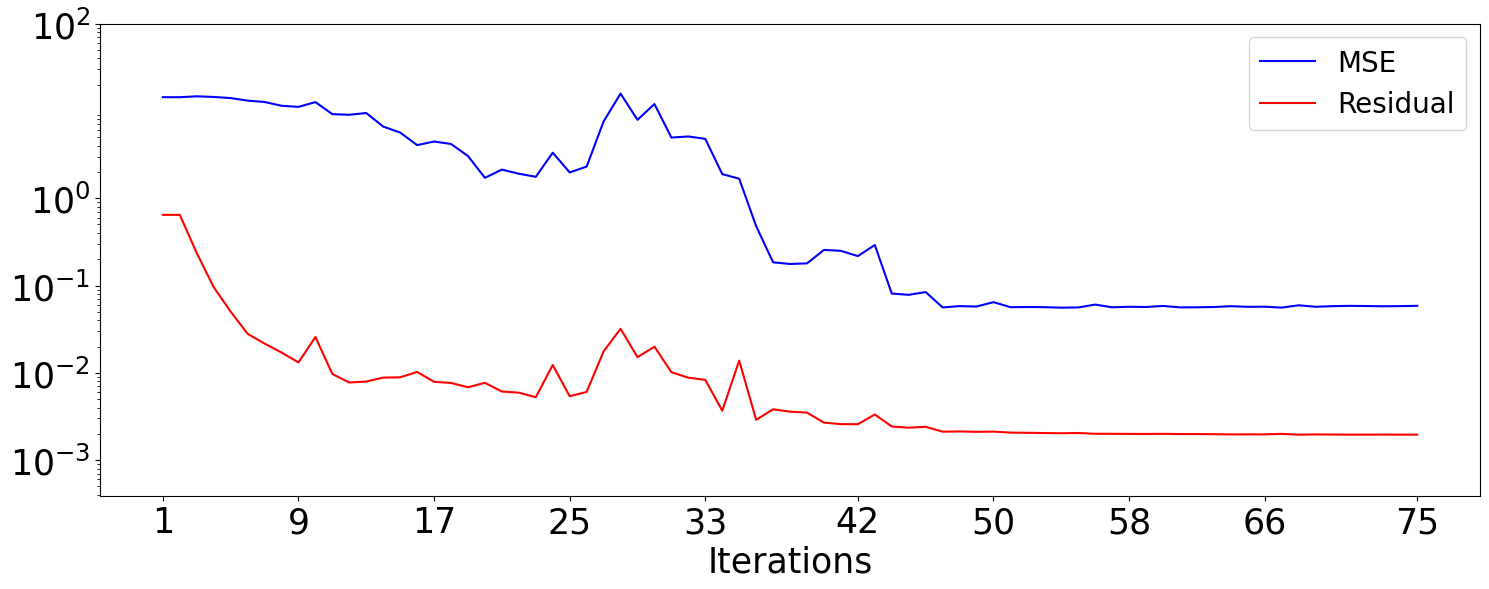

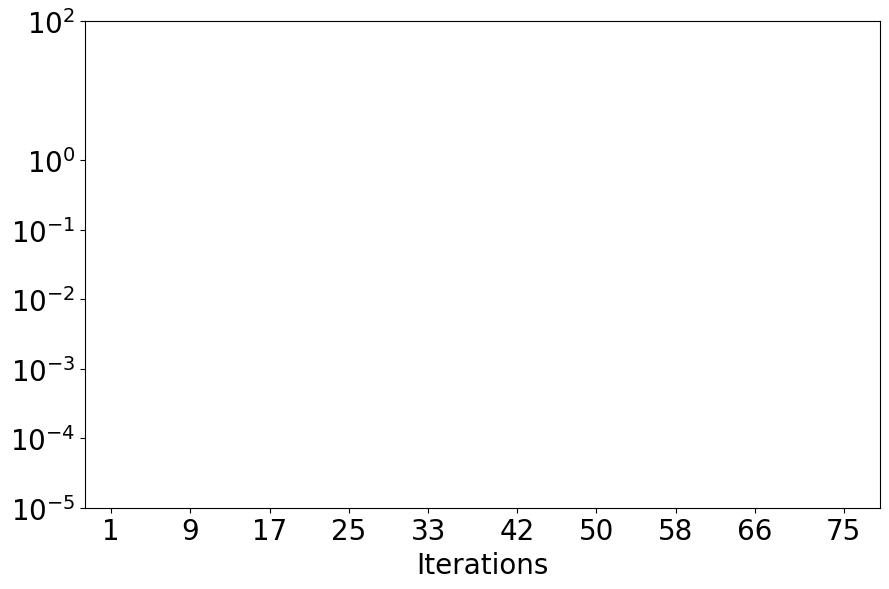

In [123]:
reload(vis)
reload(tst)
# Number 1736
tst.solution_sample(ckpt_best, data, device)